In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

results = pd.read_csv('spreadspoke_scores.csv')
teams = pd.read_csv('nfl_teams.csv')

In [233]:
results.describe()

,schedule_season,score_home,score_away,spread_favorite,weather_temperature,weather_wind_mph
count,12678.000000,12678.000000,12678.000000,10199.000000,11936.000000,11936.00000
mean,1994.434769,22.364411,19.602776,-5.379498,58.621230,7.85196
std,15.297243,10.565200,10.153315,3.431007,15.539348,5.62761
min,1966.000000,0.000000,0.000000,-26.500000,-6.000000,0.00000
25%,1981.000000,14.000000,13.000000,-7.000000,48.000000,4.00000
50%,1995.000000,21.000000,20.000000,-4.500000,61.000000,8.00000
75%,2008.000000,29.000000,27.000000,-3.000000,72.000000,12.00000
max,2019.000000,72.000000,62.000000,0.000000,97.000000,40.00000


In [234]:
results.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,09/02/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN
1,09/03/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN
2,09/04/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN
3,09/09/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN
4,09/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN


In [235]:
teams.head()


,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central


In [236]:
results.count()

schedule_date          12678
schedule_season        12678
schedule_week          12678
schedule_playoff       12678
team_home              12678
score_home             12678
score_away             12678
team_away              12678
team_favorite_id       10199
spread_favorite        10199
over_under_line        10189
stadium                12678
stadium_neutral        12678
weather_temperature    11936
weather_wind_mph       11936
weather_humidity        8388
weather_detail          2639
dtype: int64

In [237]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12678 entries, 0 to 12677
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        12678 non-null  object 
 1   schedule_season      12678 non-null  int64  
 2   schedule_week        12678 non-null  object 
 3   schedule_playoff     12678 non-null  bool   
 4   team_home            12678 non-null  object 
 5   score_home           12678 non-null  int64  
 6   score_away           12678 non-null  int64  
 7   team_away            12678 non-null  object 
 8   team_favorite_id     10199 non-null  object 
 9   spread_favorite      10199 non-null  float64
 10  over_under_line      10189 non-null  object 
 11  stadium              12678 non-null  object 
 12  stadium_neutral      12678 non-null  bool   
 13  weather_temperature  11936 non-null  float64
 14  weather_wind_mph     11936 non-null  float64
 15  weather_humidity     8388 non-null  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A3EA965C8>,
      dtype=object)

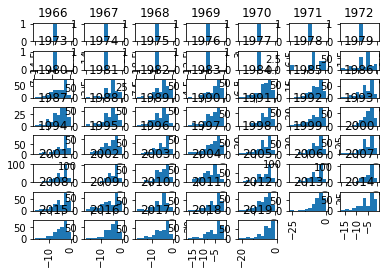

In [238]:
results.hist(column='spread_favorite', by=['schedule_season'])

In [239]:
#identify missing spread seasons
results.groupby('schedule_season').spread_favorite.count()

schedule_season
1966      1
1967      1
1968      1
1969      1
1970      1
1971      1
1972      1
1973      1
1974      1
1975      1
1976      1
1977      1
1978     10
1979    233
1980    233
1981    233
1982    141
1983    233
1984    233
1985    233
1986    233
1987    177
1988    233
1989    233
1990    235
1991    235
1992    235
1993    235
1994    235
1995    251
1996    251
1997    251
1998    251
1999    259
2000    259
2001    259
2002    267
2003    267
2004    267
2005    267
2006    267
2007    267
2008    267
2009    267
2010    267
2011    267
2012    267
2013    267
2014    267
2015    267
2016    267
2017    267
2018    267
2019    267
Name: spread_favorite, dtype: int64

In [240]:
#usableresults = results.loc[(results['schedule_season']>1978) 
results.dtypes

schedule_date           object
schedule_season          int64
schedule_week           object
schedule_playoff          bool
team_home               object
score_home               int64
score_away               int64
team_away               object
team_favorite_id        object
spread_favorite        float64
over_under_line         object
stadium                 object
stadium_neutral           bool
weather_temperature    float64
weather_wind_mph       float64
weather_humidity        object
weather_detail          object
dtype: object

In [241]:
#drop seasons without spreads
index_names = results[ results['schedule_season'] < 1979 ].index 
results.drop(index_names, inplace = True) 

In [242]:
results.groupby('schedule_season').spread_favorite.count()

schedule_season
1979    233
1980    233
1981    233
1982    141
1983    233
1984    233
1985    233
1986    233
1987    177
1988    233
1989    233
1990    235
1991    235
1992    235
1993    235
1994    235
1995    251
1996    251
1997    251
1998    251
1999    259
2000    259
2001    259
2002    267
2003    267
2004    267
2005    267
2006    267
2007    267
2008    267
2009    267
2010    267
2011    267
2012    267
2013    267
2014    267
2015    267
2016    267
2017    267
2018    267
2019    267
Name: spread_favorite, dtype: int64

In [243]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10177 entries, 2501 to 12677
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        10177 non-null  object 
 1   schedule_season      10177 non-null  int64  
 2   schedule_week        10177 non-null  object 
 3   schedule_playoff     10177 non-null  bool   
 4   team_home            10177 non-null  object 
 5   score_home           10177 non-null  int64  
 6   score_away           10177 non-null  int64  
 7   team_away            10177 non-null  object 
 8   team_favorite_id     10177 non-null  object 
 9   spread_favorite      10177 non-null  float64
 10  over_under_line      10177 non-null  object 
 11  stadium              10177 non-null  object 
 12  stadium_neutral      10177 non-null  bool   
 13  weather_temperature  9665 non-null   float64
 14  weather_wind_mph     9665 non-null   float64
 15  weather_humidity     6278 non-nul

In [244]:
results.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
2501,09/01/1979,1979,1,False,Tampa Bay Buccaneers,31,16,Detroit Lions,TB,-3.0,30,Houlihan's Stadium,False,79.0,9.0,87,NaN
2502,09/02/1979,1979,1,False,Buffalo Bills,7,9,Miami Dolphins,MIA,-5.0,39,Ralph Wilson Stadium,False,74.0,15.0,74,NaN
2503,09/02/1979,1979,1,False,Chicago Bears,6,3,Green Bay Packers,CHI,-3.0,31,Soldier Field,False,78.0,11.0,68,NaN
2504,09/02/1979,1979,1,False,Denver Broncos,10,0,Cincinnati Bengals,DEN,-3.0,31.5,Mile High Stadium,False,69.0,6.0,38,NaN
2505,09/02/1979,1979,1,False,Kansas City Chiefs,14,0,Baltimore Colts,KC,-1.0,37,Arrowhead Stadium,False,76.0,8.0,71,NaN


In [245]:
teams.head()

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central


In [246]:
teams['team_name'].value_counts()
#merged_results = pd.merge(results, teams, left_on=['team_home','column1'], right_on=['team_name','column1'], how='left')

Atlanta Falcons         1
Indianapolis Colts      1
Los Angeles Chargers    1
Tennessee Titans        1
Houston Oilers          1
Cincinnati Bengals      1
Green Bay Packers       1
Seattle Seahawks        1
Philadelphia Eagles     1
Los Angeles Rams        1
Minnesota Vikings       1
Boston Patriots         1
Chicago Bears           1
Carolina Panthers       1
Dallas Cowboys          1
Kansas City Chiefs      1
Cleveland Browns        1
Baltimore Ravens        1
Oakland Raiders         1
Los Angeles Raiders     1
Denver Broncos          1
New York Jets           1
Arizona Cardinals       1
Washington Redskins     1
Phoenix Cardinals       1
Tampa Bay Buccaneers    1
Miami Dolphins          1
Houston Texans          1
Jacksonville Jaguars    1
Detroit Lions           1
Pittsburgh Steelers     1
Buffalo Bills           1
St. Louis Rams          1
San Francisco 49ers     1
Baltimore Colts         1
San Diego Chargers      1
New Orleans Saints      1
St. Louis Cardinals     1
New York Gia

In [269]:
#merge teams data to bring in ID for identifying favorites

teams1 = teams.rename(columns={'team_name': 'team_home'})
results1 = pd.merge(results,teams1[['team_home','team_id']],on='team_home', how='left')
results1.rename(columns={'team_id': 'home_id'},inplace=True)
teams2 = teams1.rename(columns={'team_home': 'team_away'})
results2 = pd.merge(results1,teams2[['team_away','team_id']],on='team_away', how='left')
results2.rename(columns={'team_id': 'away_id'},inplace=True)

In [270]:
results2.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,home_id,away_id
0,09/01/1979,1979,1,False,Tampa Bay Buccaneers,31,16,Detroit Lions,TB,-3.0,30,Houlihan's Stadium,False,79.0,9.0,87,NaN,TB,DET
1,09/02/1979,1979,1,False,Buffalo Bills,7,9,Miami Dolphins,MIA,-5.0,39,Ralph Wilson Stadium,False,74.0,15.0,74,NaN,BUF,MIA
2,09/02/1979,1979,1,False,Chicago Bears,6,3,Green Bay Packers,CHI,-3.0,31,Soldier Field,False,78.0,11.0,68,NaN,CHI,GB
3,09/02/1979,1979,1,False,Denver Broncos,10,0,Cincinnati Bengals,DEN,-3.0,31.5,Mile High Stadium,False,69.0,6.0,38,NaN,DEN,CIN
4,09/02/1979,1979,1,False,Kansas City Chiefs,14,0,Baltimore Colts,KC,-1.0,37,Arrowhead Stadium,False,76.0,8.0,71,NaN,KC,IND
